In [ ]:
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif
import random
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
import seaborn as sn
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
import numpy
import pandas
from keras.models import Sequential
import time
from keras.layers import Dense, Input, advanced_activations
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.regularizers import l1_l2
from keras.layers import Dropout
from sklearn.model_selection import KFold 
from sklearn.utils import shuffle
from keras.models import load_model
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


   id  having_IP_Address  ...  Statistical_report  Result
0   1                 -1  ...                  -1      -1
1   2                  1  ...                   1      -1
2   3                  1  ...                  -1      -1
3   4                  1  ...                   1      -1
4   5                  1  ...                   1       1

[5 rows x 32 columns]
          id  having_IP_Address  ...  Statistical_report  Result
11050  11051                  1  ...                   1       1
11051  11052                 -1  ...                   1      -1
11052  11053                  1  ...                   1      -1
11053  11054                 -1  ...                   1      -1
11054  11055                 -1  ...                  -1      -1

[5 rows x 32 columns]
                 id  having_IP_Address  ...  Statistical_report        Result
count  11055.000000       11055.000000  ...        11055.000000  11055.000000
mean    5528.000000           0.313795  ...            0.719

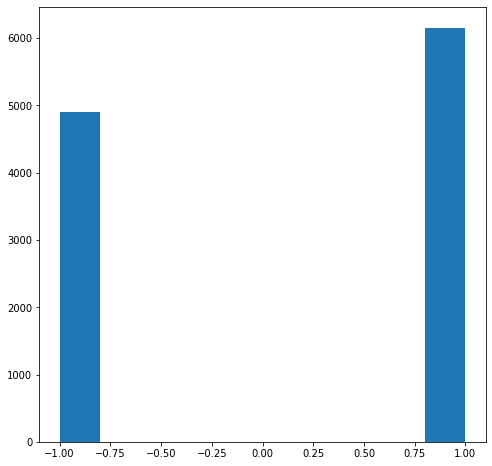

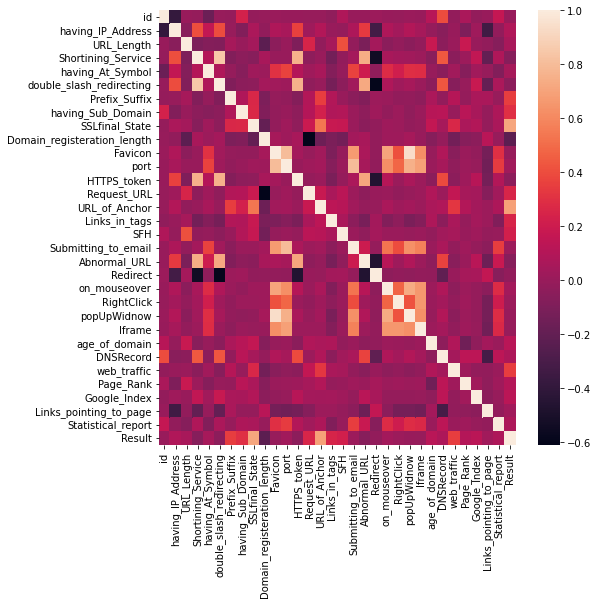

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/UCI_1.csv')


print(data.head())
print(data.tail())
print(data.describe())
plt.figure(figsize =(8,8))
plt.hist(data.Result)           


print(data.isnull().sum())        

print(data.corr())

import seaborn as sns
plt.figure(figsize =(8,8))
sns.heatmap(data.corr())    
print(data.corr()['Result'].sort_values())   

In [ ]:
print(data.corr())


                                   id  ...    Result
id                           1.000000  ...  0.000978
having_IP_Address           -0.388317  ...  0.094160
URL_Length                   0.006105  ...  0.057430
Shortining_Service          -0.006281  ... -0.067966
having_At_Symbol            -0.169478  ...  0.052948
double_slash_redirecting    -0.003363  ... -0.038608
Prefix_Suffix               -0.007340  ...  0.348606
having_Sub_Domain            0.234091  ...  0.298323
SSLfinal_State              -0.006682  ...  0.714741
Domain_registeration_length -0.001180  ... -0.225789
Favicon                      0.007293  ... -0.000280
port                         0.001656  ...  0.036419
HTTPS_token                  0.002916  ... -0.039854
Request_URL                 -0.000862  ...  0.253372
URL_of_Anchor               -0.005071  ...  0.692935
Links_in_tags               -0.028865  ...  0.248229
SFH                          0.085354  ...  0.221419
Submitting_to_email          0.005828  ...  0.

In [ ]:
i

In [ ]:
def get_data( ):
    
    
    
  dataset = pd.read_csv('/content/drive/MyDrive/UCI_1.csv', sep=',')
  dataset = dataset.drop('id', axis=1)
        
  feature_names_dataset = []
  for col in dataset.columns:
    feature_names_dataset.append(col)
  features_dataset = dataset[feature_names_dataset[:-1]].values
  labels_dataset = dataset['Result'].values

  (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                            labels_dataset, test_size=0.3, random_state=np.random.seed(173))
        
 
        
  return dataset, features_dataset, labels_dataset, feature_names_dataset


In [ ]:
def Get_Data_Neural_Network(dataset):
    np.random.seed(1)
    
        
       
    
    dataframe = pandas.read_csv("UCI_1.csv", sep=',')
    dataframe = dataframe.drop('id', axis=1)
    dataset = dataframe.values
    
    X = dataset[:,0:30].astype(float)
    Y = dataset[:,30]
        
    
    
    return X, Y

In [ ]:
def train_evaluate_ML_classifier(classifier, train_1, train_labels_1, test_1, test_labels_1):
    
    kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1)) 
    train_accuracy = []
    validation_accuracy = []
    np.random.seed(1)
    start = time.time()

    if classifier == 'DecisionTree':
        clf = DecisionTreeClassifier(max_depth=30, criterion='gini')
    
    elif classifier == 'SVM':
        clf = svm.LinearSVC()
        
    elif classifier == 'RandomForest':
        clf = RandomForestClassifier(max_depth=30, criterion='gini')
        
    elif classifier == 'NaiveBayes':
        clf = GaussianNB()
        
    elif classifier == 'KNeighbors':
        clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
        
    else:
        pass
    
    for train_index, validation_index in kf.split(train_1, train_labels_1):
    #     print("Train:", train_index, "Validation:",test_index)
        X_train, X_validation = train_1[train_index], train_1[validation_index] 
        y_train, y_validation = train_labels_1[train_index], train_labels_1[validation_index]
        clf.fit(X_train, y_train)

        
        conf_mat = (confusion_matrix(y_train, clf.predict(X_train)))
        tn, fp, fn, tp = conf_mat.ravel()
        accuracy = (tp + tn) / (tp+tn+fp+fn)
            
       
        
        train_accuracy.append(accuracy)

        
        
        
        validation_conf_mat = (confusion_matrix(y_validation, clf.predict(X_validation)))
        tn, fp, fn, tp = validation_conf_mat.ravel()
        validation_acc = (tp + tn) / (tp+tn+fp+fn)
        validation_accuracy.append(validation_acc)
        
        
    end = time.time()
    print('Time to train '+classifier+' on Dataset '+' is: ' + str(end - start))
    
    
    test_conf_mat = (confusion_matrix(test_labels_1, clf.predict(test_1)))
    dataset_3_confusion_mat = 0
        
    return train_accuracy, validation_accuracy, test_conf_mat, dataset_3_confusion_mat


In [ ]:
def get_scores(confusion_matrix):
    
    tn = 0
    tp = 0
    fp = 0
    fn = 0
    specificity = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    test_acc = (tp + tn) / (tp+tn+fp+fn)
    specificity = tn / (tn+fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall)/(precision + recall))
    
    return test_acc, specificity, precision, recall, f1_score

In [ ]:
def RecursiveFeatureElimination(features, labels, feature_names_dataset):
    
    np.random.seed(1)
    dtc = RandomForestClassifier(criterion = "gini", max_depth=10)
    rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(5),
                  scoring='accuracy')
    rfecv.fit(features, labels)
    arr = rfecv.ranking_
    names = []
    j=1
    for i in range (len(arr)):
        if arr[i] == 1:
            names.append(feature_names_dataset[i])
    return names, rfecv

In [ ]:
def LassoFeatureSelection(features, labels, feature_names):
    
    reg = LassoCV()
    reg.fit(features, labels)
    coef = pd.Series(reg.coef_, index = feature_names)
    
    return coef

In [ ]:
train_accuracy = []
validation_accuracy = []
selected_features_1 = []
selected_features_2 = []
selected_features_3 = []
test_confusion_matrix = None
plot_name = ''
np.random.seed(1)
print('WITHOUT FEATURE SELECTION \n\n')
classifiers = ['DecisionTree', 'SVM', 'RandomForest', 'NaiveBayes', 'KNeighbors']

    
for classifier in classifiers:
      print('\n\n' + classifier)
      dataset, features_dataset, labels_dataset, feature_names_dataset = get_data()
      (train, test, train_labels, test_labels) = train_test_split(features_dataset, 
                                                                labels_dataset, test_size=0.3, 
                                                                        random_state=np.random.seed(173))
    
      plot_name = (classifier + '_without_feature_selection_on_Dataset_')
      train_accuracy, validation_accuracy, test_confusion_matrix, dataset_3_confusion_mat = train_evaluate_ML_classifier(classifier,train, train_labels, test, test_labels)
           
      test_acc, specificity, precision, recall, f1_score = get_scores(test_confusion_matrix)
      print("Accuracy:"+str(test_acc))
      print("Specificity:"+str(specificity))
      print("Precision:"+str(precision))
      print("Recall:"+str(recall))
      print("F1 Score:"+str(f1_score))
     
             
     # Get_Plots(classifier, specificity, precision, recall, f1_score, test_confusion_matrix, plot_name)
             

WITHOUT FEATURE SELECTION 




DecisionTree
Time to train DecisionTree on Dataset  is: 0.10791754722595215
Accuracy:0.9529695507989147
Specificity:0.9464769647696477
Precision:0.9571351058057515
Recall:0.9581749049429658
F1 Score:0.9576547231270358


SVM
Time to train SVM on Dataset  is: 1.3471589088439941
Accuracy:0.9258365993367501
Specificity:0.9004065040650406
Precision:0.9221810481736369
Recall:0.9462248777838131
F1 Score:0.9340482573726543


RandomForest
Time to train RandomForest on Dataset  is: 2.726818561553955
Accuracy:0.9650286403376545
Specificity:0.9471544715447154
Precision:0.9585326953748007
Recall:0.9793590439978272
F1 Score:0.968833960236432


NaiveBayes
Time to train NaiveBayes on Dataset  is: 0.08473753929138184
Accuracy:0.6047633403678022
Specificity:0.9979674796747967
Precision:0.9944029850746269
Recall:0.289516567083107
F1 Score:0.44846445098864124


KNeighbors
Time to train KNeighbors on Dataset  is: 6.86834716796875
Accuracy:0.9342779620138679
Specificity:0.9254

In [ ]:
classifiers = ['DecisionTree', 'SVM', 'RandomForest', 'NaiveBayes', 'KNeighbors']
np.random.seed(1)

print('WITH RECURSIVE FEATURE ELIMINATION \n\n')

dataset, features_dataset, labels_dataset, feature_names_dataset = get_data()
selected_features, rfecv = RecursiveFeatureElimination(features_dataset, labels_dataset, feature_names_dataset)
selected_feats = []
selected_feats = dataset[selected_features].values
(train, test, train_labels, test_labels) = train_test_split(selected_feats, 
                                                                labels_dataset, test_size=0.3, 
                                                                random_state=np.random.seed(173))
    
print('Number of features selected by Recursive Feature Elimination for Dataset are: ' + str(rfecv.n_features_) + '\n')
for classifier in classifiers:
        print('\n\n' + classifier)
        
        train_accuracy, validation_accuracy, test_confusion_matrix, dataset_3_confusion_mat = train_evaluate_ML_classifier(classifier,train, train_labels, test, test_labels)
           
        test_acc, specificity, precision, recall, f1_score = get_scores(test_confusion_matrix)
        print("Accuracy:"+str(test_acc))
        print("Specificity:"+str(specificity))
        print("Precision:"+str(precision))
        print("Recall:"+str(recall))
        print("F1 Score:"+str(f1_score))
     
            
            

WITH RECURSIVE FEATURE ELIMINATION 


Number of features selected by Recursive Feature Elimination for Dataset are: 17



DecisionTree
Time to train DecisionTree on Dataset  is: 0.08744692802429199
Accuracy:0.9445281881217968
Specificity:0.9369918699186992
Precision:0.9495387954422138
Recall:0.9505703422053232
F1 Score:0.9500542888165038


SVM
Time to train SVM on Dataset  is: 0.7408332824707031
Accuracy:0.9234247814290021
Specificity:0.8949864498644986
Precision:0.9182920400632578
Recall:0.9462248777838131
F1 Score:0.9320492241840558


RandomForest
Time to train RandomForest on Dataset  is: 2.5059242248535156
Accuracy:0.9586976183298161
Specificity:0.943089430894309
Precision:0.9551282051282052
Recall:0.971211298207496
F1 Score:0.9631026124427687


NaiveBayes
Time to train NaiveBayes on Dataset  is: 0.06898975372314453
Accuracy:0.6020500452215858
Specificity:1.0
Precision:1.0
Recall:0.2829983704508419
F1 Score:0.441151566469094


KNeighbors
Time to train KNeighbors on Dataset  is: 6.6

In [ ]:

classifiers = ['DecisionTree', 'SVM', 'RandomForest', 'NaiveBayes', 'KNeighbors']
print('FEATURE SELECTION WITH FILTER METHOD \n\n')
np.random.seed(1)


      
num_feats = 18
    
dataset, features_dataset, labels_dataset, feature_names_dataset = get_data()
filtered_features = SelectKBest(mutual_info_classif, k=num_feats).fit_transform(features_dataset, labels_dataset)
(train, test, train_labels, test_labels) = train_test_split(filtered_features, 
                                                                labels_dataset, test_size=0.3, 
                                                                random_state=np.random.seed(173))
    
print('Filter Method with ' + str(len(filtered_features[0])) + ' selected features' +'\n')
for classifier in classifiers:
            print('\n\n' + classifier)
            plot_name = (classifier + '_with_Filter_Method_on_Dataset_' )
            train_accuracy, validation_accuracy, test_confusion_matrix, dataset_3_confusion_mat = train_evaluate_ML_classifier(classifier,train, train_labels, test, test_labels)
            test_acc, specificity, precision, recall, f1_score = get_scores(test_confusion_matrix)
            print("Accuracy:"+str(test_acc))
            print("Specificity:"+str(specificity))
            print("Precision:"+str(precision))
            print("Recall:"+str(recall))
            print("F1 Score:"+str(f1_score))


FEATURE SELECTION WITH FILTER METHOD 


Filter Method with 18 selected features



DecisionTree
Time to train DecisionTree on Dataset  is: 0.09712362289428711
Accuracy:0.9412119384986434
Specificity:0.9424119241192412
Precision:0.9531938325991189
Recall:0.9402498642042368
F1 Score:0.9466776045939294


SVM
Time to train SVM on Dataset  is: 0.7606430053710938
Accuracy:0.9201085318058486
Specificity:0.8915989159891599
Precision:0.9156118143459916
Recall:0.9429657794676806
F1 Score:0.9290875033449292


RandomForest
Time to train RandomForest on Dataset  is: 2.5700457096099854
Accuracy:0.9553813687066627
Specificity:0.940379403794038
Precision:0.9529159978598181
Recall:0.9674090168386746
F1 Score:0.9601078167115903


NaiveBayes
Time to train NaiveBayes on Dataset  is: 0.0753939151763916
Accuracy:0.6011456135061802
Specificity:1.0
Precision:1.0
Recall:0.2813688212927757
F1 Score:0.43916913946587544


KNeighbors
Time to train KNeighbors on Dataset  is: 6.635483503341675
Accuracy:0.92734398552

In [ ]:
from sklearn.linear_model import LogisticRegression
def LogesticRegression(data):
    X_train, X_test, y_train, y_test = trainTestSplit(data)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    result = LR.score(X_test,y_test)

    return result


In [ ]:

import pandas
import random
import numpy as np
import math
import gc
import copy

class ACO:

    def __init__(self,data,maxIteration,antNumber,cc,Q,e):
        self.data = data
        self.fp = [cc]*(len(data.columns)-1)
        self.maxIteration = maxIteration
        self.ants = []
        self.size = len(data.columns)-1
        self.antNumber= antNumber
        self.Q = Q
        self.bestScore = 0
        self.result=[]
        self.evaporate = e
        self.colonyMax = 0
        self.colonyQuality = 0



    def constructSolution(self,ant):
        featureSetIndex = []
        for j in range(self.size):
            decision = random.random()
            if decision < self.fp[j] / 2.0:
                featureSetIndex.append(1)
            else:
                featureSetIndex.append(0)
        features = [0]
        for i, obj in enumerate(featureSetIndex):
            if obj:
                features.append(i+1)
        newdata = self.data.iloc[:, features]
        if sum(featureSetIndex) == 0:
            score = 0.5
        else:
            score = float(cm.LogesticRegression(newdata))
        ant.val = score
        ant.subsets = copy.deepcopy(featureSetIndex)
        return ant

    def ApplyLocalSearch(self):
        maxScore = 0
        maxSet = []
        for a in self.ants:
            if maxScore < a.val or (maxScore == a.val and (maxSet and sum(a.subsets) < sum(maxSet))):
                maxScore = a.val
                maxSet = a.subsets

        if self.bestScore <= maxScore or (maxScore == self.bestScore and (self.result and sum(maxSet) < sum(self.result))):
            self.bestScore = maxScore
            self.result = maxSet

        #print(maxScore)
        self.colonyMax += maxScore
        return maxSet, maxScore

    def UpdatePheromones(self,bestSet, bestScore):
        for i,v in enumerate(bestSet):
            self.fp[i] = self.fp[i]*self.evaporate
            if v == 1:
                weight = (bestScore-0.5)*2
                self.fp[i] = self.fp[i] + self.Q*weight

    def simulate(self):
        for s in range(self.maxIteration):
            for i in range(self.antNumber):
                ant = Ant()
                ant = self.constructSolution(ant)
                self.ants.append(ant)
            bestSet, bestScore = self.ApplyLocalSearch()
            self.UpdatePheromones(bestSet, bestScore)
            self.ants = []

        shortFeaturesName = list(self.data.columns.values)
        bestFeatureName = []
        for ind, obj in enumerate(self.result):
            if obj:
                bestFeatureName.append(shortFeaturesName[ind + 1])

        return ["Best", bestFeatureName, self.bestScore]

    def run(self):
        for s in range(self.maxIteration):
            for i in range(self.antNumber):
                ant = Ant()
                ant = self.constructSolution(ant)
                self.ants.append(ant)
            bestSet, bestScore = self.ApplyLocalSearch()
            self.UpdatePheromones(bestSet, bestScore)
            self.ants = []

        shortFeaturesName = list(self.data.columns.values)
        bestFeatureName = []
        for ind, obj in enumerate(self.result):
            if obj:
                bestFeatureName.append(shortFeaturesName[ind + 1])

        self.colonyQuality = self.colonyMax / self.maxIteration # the overall ant colony quality over iterations
        return self.bestScore, self.result, self.colonyQuality

class Ant:
    def __init__(self):
        self.subsets = []
        self.val = 0


In [ ]:
import loader as ld
import pandas
import gc
import math


import ACO.ACO as aco

import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd





def main():
    #loader = ld.loader()
    # crimeData = loader.loadCrime("communities.data.csv")
    # irisData = loader.loadIris("Iris.csv")
    #cancerData = loader.pdLoadCancer("data.csv")

    # shortLength = 20
    # T = math.ceil(math.sqrt(shortLength))
    #shortCancerData = cancerData.ix[:, 1:]
    data = pd.read_csv('/content/drive/MyDrive/UCI_1.csv')


    acoModel = aco.ACO(data,maxIteration=100,antNumber=100,cc=1,Q=0.1,e=0.95)
    result = acoModel.simulate()
    print(result)










  






    # result = cm.KNNeighbors(cancerData)
    # print("Using Knn with 5 neighbour, all features accuracy: "+str(result*100) + '%')
    # result = cm.LogesticRegression(cancerData)
    # print("Using Logestic Regression, all features accuracy: " + str(result * 100) + '%')








if __name__ == '__main__':
    main()